# Grid Search로 parameter찾아보기

최적의 가중치를 계산하기 위한 한가지 방법으로<br> 각 weight의 case별로 값을 대입하여 경험적으로 찾는방법이 있다.
<br> 아래는  W0 의 케이스 수 100개,  W1 의 케이스 수 100개로
총  (W0,W1) 의 조합수 10000개를 대입하여 찾은 최적가중치 이다.

In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

- 간단한 데이터 세트를 load한다.

In [2]:
movie_df = pd.DataFrame([
    [8759, 487],
    [10132,612],
    [12078,866],
    [16430,1030]],
    columns=["nums_want_to_see","nums_audience"])
movie_df.index = ["마션","킹스맨","캡틴아메리카","인터스텔라"]
movie_df

,nums_want_to_see,nums_audience
마션,8759,487
킹스맨,10132,612
캡틴아메리카,12078,866
인터스텔라,16430,1030


- 손실함수는 MSE를 사용하여 모든 weight쌍에 대해 loss를 측정한다.

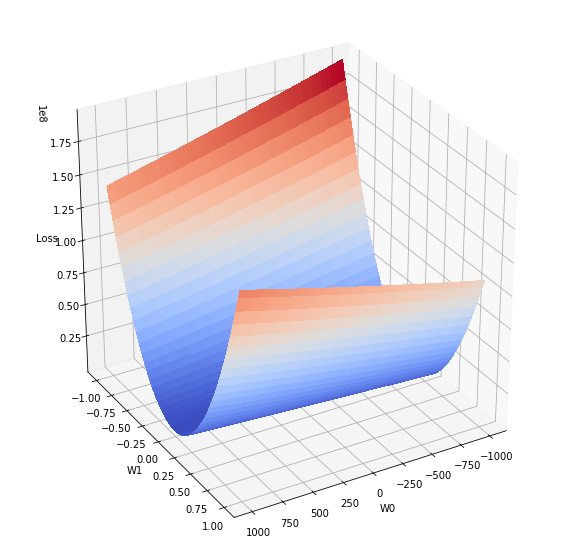

In [3]:
# 가중치 조합 만들기
W0s = np.linspace(-1000,1000,100)
W1s = np.linspace(-1,1,100)

points = np.stack(np.meshgrid(W0s,W1s),axis=-1) # 가중치 조합 만들기
points = points.reshape(-1,2)
points

# 손실 함수값 계산하기
def calculate_MSE(W0, W1):
    X = movie_df.nums_want_to_see # 독립 변수, 보고싶어요 수
    y_true = movie_df.nums_audience # 실제값

    y_pred = W1*X+W0 # 가중치 조합을 통한 예측값
    return ((y_true - y_pred)**2).mean() # MSE

losses = []
for W0, W1 in points:
    loss = calculate_MSE(W0, W1)
    losses.append(loss)
losses = np.array(losses)

# 가중치 별 손실값 확인하기
points_with_loss = np.concatenate([points,
                                   losses.reshape(-1,1)],
                                  axis=1)

loss_df = pd.DataFrame(points_with_loss,columns=['W0','W1','Loss'])

# 가중치 시각화
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

surf_value = loss_df.values.reshape(100,100,3)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X=surf_value[:,:,0],
                       Y=surf_value[:,:,1],
                       Z=surf_value[:,:,2],
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
ax.view_init(azim=60)
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Loss')
plt.show()

위의 방식(Grid Search)으로 가중치 조합을 찾게 되면 아래의 문제가 발생함

1. 각 가중치 당 케이스 수를 늘리면 연산이 크게 늘어난다.
2. 가중치 종류의 수가 늘어나면 연산이 크게 늘어난다.
3. 손실함수 계산 횟수=가중치 종류의 갯수^가중치 당 케이스 수 
로 폭발적으로 계산이 늘어난다.
<br> 이와 같이 간단한 함수 관계에서는 가능하지만,
훨씬 가중치의갯수가 많고, 데이터 수가 많으면 연산량이 너무 커지게 됨.